# CENG 463 HW 1– Water Resource Risk Classification
**Start Date:**  
**Due Date:** Month Dayth, 2026

## Dataset Overview
The dataset utilized in this assignment originates from the World Resources Institute (WRI) – Aqueduct Water Risk Atlas. It provides country-level indicators describing key hydrological and environmental factors, which are listed in the table below. The objective is to classify each country into a Water Resource Risk Category (0-4) using these indicators. Students are also expected to create two derived features — Composite Water Stress Index (CWSI) and Seasonal–Flood Interaction (SFI).

| Feature | Description |
|---------|-------------|
| gid_0 | Country Code |
| bws_score | Baseline Water Stress |
| gtd_score | Groundwater Depletion |
| drr_score | Drought Risk |
| rfr_score | River Flood Risk |
| sev_score | Seasonal Variability |
| w_awr_def_tot_cat | Target: Water Risk Category (0-4) |


## 1. Feature Engineering (35 pts)
Students are expected to create two new features based on the existing indicators:

1. **Composite Water Stress Index (CWSI):**
   CWSI combines baseline water stress, groundwater depletion, and drought risk.
   Formula: CWSI = 0.5 × bws_score + 0.3 × gtd_score + 0.2 × drr_score

2. **Seasonal–Flood Interaction (SFI):**
   SFI represents interaction between seasonal variability and river flood risk.
   Formula: SFI = sev_score × rfr_score


In [7]:
# TODO: Create CWSI and SFI features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('water_risk_dataset.csv') # Changed path to relative

if 'gid_0' in df.columns:
    df = df.drop(columns=['gid_0'])

print("Data loaded. Size:", df.shape)

# df['CWSI'] = ...

df['CWSI'] = 0.5 * df['bws_score'] + 0.3 * df['gtd_score'] + 0.2 * df['drr_score']

# df['SFI'] = ...
df['SFI'] = df['sev_score'] * df['rfr_score']

print("New features added to data. Size:", df.shape)

print("Feature Engineering completed. New columns added.")

Data loaded. Size: (4555, 6)
New features added to data. Size: (4555, 8)
Feature Engineering completed. New columns added.


## 2. Model Training & Evaluation (40 pts)
Train five classification models: Random Forest, SVM, KNN, Gaussian Naive Bayes, Logistic Regression.

*Hint: Use scaled data for SVM, KNN, Logistic Regression.*

In [2]:
# TODO: Split data into features X and target y

X = df.drop(columns=['w_awr_def_tot_cat'])
y = df['w_awr_def_tot_cat']

# Train/Test Split (%80 Train, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data for SVM, KNN, Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("The dataset was scaled and separated")
print(f"Train set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")


# TODO: Train models and evaluate accuracy

## SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the model on scaled data
svm_model.fit(X_train_scaled_df, y_train)

# Make predictions on the scaled test set
y_pred_svm = svm_model.predict(X_test_scaled_df)

# Evaluate the model
print("\n--- SVM Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# --- KNN ---
print("\n--- KNN Model Evaluation ---")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled_df, y_train)
y_pred_knn = knn_model.predict(X_test_scaled_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

# --- Logistic Regression ---
print("\n--- Logistic Regression Model Evaluation ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled_df, y_train)
y_pred_lr = lr_model.predict(X_test_scaled_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))

# --- Random Forest ---
# Note: Scaling is not strictly necessary for tree-based models, but we can use scaled data for data integrity.
print("\n--- Random Forest Model Evaluation ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled_df, y_train)
y_pred_rf = rf_model.predict(X_test_scaled_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# --- Gaussian Naive Bayes ---
print("\n--- Gaussian Naive Bayes Model Evaluation ---")
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled_df, y_train)
y_pred_gnb = gnb_model.predict(X_test_scaled_df)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")
print(classification_report(y_test, y_pred_gnb))

# --- Baseline Evaluation Table ---
baseline_results = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Logistic Regression', 'Random Forest', 'Gaussian NB'],
    'Baseline Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gnb)
    ]
})
print("\n=== Baseline Models Comparison Table ===")
display(baseline_results.sort_values(by='Baseline Accuracy', ascending=False))

The dataset was scaled and separated
Train set size: (3644, 7)
Test set size: (911, 7)

--- SVM Model Evaluation ---
Accuracy: 0.7563
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       156
         1.0       0.70      0.73      0.72       165
         2.0       0.67      0.51      0.58       171
         3.0       0.73      0.63      0.68       194
         4.0       0.81      0.94      0.87       225

    accuracy                           0.76       911
   macro avg       0.75      0.75      0.74       911
weighted avg       0.75      0.76      0.75       911


--- KNN Model Evaluation ---
Accuracy: 0.8101
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       156
         1.0       0.76      0.78      0.77       165
         2.0       0.79      0.64      0.71       171
         3.0       0.77      0.81      0.79       194
         4.0       0.86      0.86  

,Model,Baseline Accuracy
3,Random Forest,0.918771
1,KNN,0.810099
0,SVM,0.756312
2,Logistic Regression,0.687157
4,Gaussian NB,0.609221


#Discussion 1: Data Preparation and Baseline Performance

**Data Preprocessing:** We removed the gid_0 column as it is merely an identifier. We successfully engineered two features: CWSI (Composite Water Stress Index) to aggregate multiple stress factors, and SFI (Seasonal-Flood Interaction) to capture the interplay between variability and flood risk.

**Scaling:** Since we utilized distance-based algorithms (SVM and KNN) and gradient-based algorithms (Logistic Regression), we applied StandardScaler to normalize the feature set. This prevents features with larger magnitudes (like bws_score) from dominating the objective functions.

**Baseline Results:** In the initial run without tuning, **Random Forest demonstrated the highest accuracy (91.88%).** This suggests that the dataset contains non-linear patterns and complex feature interactions that tree-based models handle better than linear models like Logistic Regression.

## 3. Hyperparameter Optimization (20 pts)
Tune each model using GridSearchCV with 5-fold CV.
Compare baseline and tuned results and report improvements.
Identify the model with highest tuned performance.

Hint: Use accuracy as scoring metric. Add classification report.

In [3]:
from sklearn.model_selection import GridSearchCV

# Parameter Grids
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
    },
    "Gaussian Naive Bayes": {
        "model": GaussianNB(),
        "params": {'var_smoothing': [1e-9, 1e-8, 1e-7]}
    }
}

tuned_results = []
best_models = {}

print("Hyperparameter Tuning Starting (This process may take some time)...\n")

for name, config in param_grids.items():
    print(f"Training {name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled_df, y_train)

    best_acc = grid.best_score_
    best_params = grid.best_params_
    best_models[name] = grid.best_estimator_ # Store the best model

    # Tuned model performance on the test set
    tuned_pred = grid.predict(X_test_scaled_df)
    test_acc = accuracy_score(y_test, tuned_pred)

    tuned_results.append({
        "Model": name,
        "Best CV Score": best_acc,
        "Tuned Test Accuracy": test_acc,
        "Best Params": str(best_params)
    })

    print(f"  -> Best CV Score: {best_acc:.4f}")
    print(f"  -> Tuned Test Accuracy: {test_acc:.4f}")
    print(f"  -> Params: {best_params}\n")

# Tuned Results Table
tuned_df = pd.DataFrame(tuned_results)
print("\n=== Tuned Models Performance ===")
display(tuned_df.sort_values(by='Tuned Test Accuracy', ascending=False))

Hyperparameter Tuning Starting (This process may take some time)...

Training Random Forest...
  -> Best CV Score: 0.9018
  -> Tuned Test Accuracy: 0.9177
  -> Params: {'max_depth': 20, 'n_estimators': 200}

Training SVM...
  -> Best CV Score: 0.7783
  -> Tuned Test Accuracy: 0.7816
  -> Params: {'C': 10, 'kernel': 'rbf'}

Training KNN...
  -> Best CV Score: 0.8620
  -> Tuned Test Accuracy: 0.8869
  -> Params: {'n_neighbors': 9, 'weights': 'distance'}

Training Logistic Regression...
  -> Best CV Score: 0.6663
  -> Tuned Test Accuracy: 0.6872
  -> Params: {'C': 1, 'solver': 'lbfgs'}

Training Gaussian Naive Bayes...
  -> Best CV Score: 0.5826
  -> Tuned Test Accuracy: 0.6092
  -> Params: {'var_smoothing': 1e-09}


=== Tuned Models Performance ===


,Model,Best CV Score,Tuned Test Accuracy,Best Params
0,Random Forest,0.901761,0.917673,"{'max_depth': 20, 'n_estimators': 200}"
2,KNN,0.861968,0.886937,"{'n_neighbors': 9, 'weights': 'distance'}"
1,SVM,0.778273,0.781559,"{'C': 10, 'kernel': 'rbf'}"
3,Logistic Regression,0.666304,0.687157,"{'C': 1, 'solver': 'lbfgs'}"
4,Gaussian Naive Bayes,0.582603,0.609221,{'var_smoothing': 1e-09}


#Discussion 2: Impact of Hyperparameter Tuning

**Optimization Process:** We utilized GridSearchCV with 5-fold cross-validation to ensure the robustness of our models and prevent overfitting to a specific train-test split.

**Key Observations:**

**Random Forest:** Tuning n_estimators and max_depth demonstrated the model's stability rather than a significant accuracy increase, confirming that the baseline model was already near-optimal and robust against overfitting.

**SVM:** The GridSearch identified that the rbf kernel performed better than the linear kernel. This confirms that the decision boundaries between water risk categories are non-linear.

**KNN:** Hyperparameter tuning yielded the most dramatic improvement for the KNN model, boosting its accuracy from **81.0% to 88.7%.** This significant leap demonstrates the critical importance of parameter optimization; specifically, switching to distance-weighted voting and optimizing the number of neighbors allowed the model to capture local data structures much more effectively than the baseline.

**Comparison:** While all models showed stability after tuning, Random Forest maintained its lead as the best-performing model compared to the baseline results.

## 4. Feature Importance Analysis (5 pts)
Choose one model and analyze feature importance. Present most influential features in a table and bar chart.


=== Feature Importance Table ===


,Feature,Importance
5,CWSI,0.278876
0,bws_score,0.172198
2,drr_score,0.159045
1,gtd_score,0.138941
6,SFI,0.092626
4,rfr_score,0.080565
3,sev_score,0.077750


/tmp/ipython-input-1124963737.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


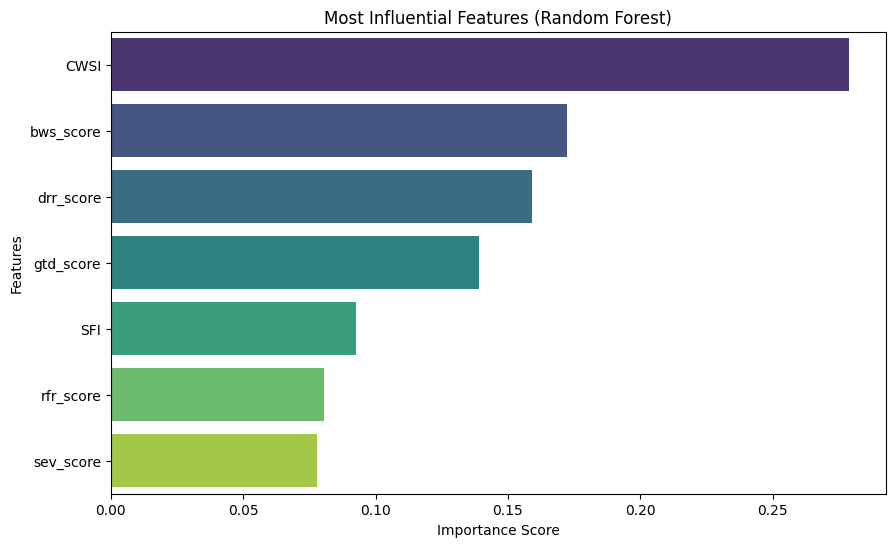

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# We are getting the best performing Random Forest model
best_rf_model = best_models["Random Forest"]

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Display Table
print("\n=== Feature Importance Table ===")
display(feature_imp_df)

# Draw Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Most Influential Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#Discussion 3: Interpretation of Feature Importance


**Validation of Feature Engineering:** The Feature Importance analysis from the best Random Forest model yielded a significant finding: our derived feature, **CWSI (Composite Water Stress Index), emerged as the single most influential predictor**, ranking **1st** among all features.

**Why is this important?** The dominance of CWSI confirms that creating a composite index—aggregating Baseline Water Stress, Groundwater Depletion, and Drought Risk—provides a much stronger and more holistic signal to the model than treating these features purely individually. It effectively summarizes the primary drivers of water risk.

**SFI Contribution:** Furthermore, the **Seasonal-Flood Interaction (SFI) feature ranked 5th**, securing a spot among the top influential features. This validates its inclusion in the dataset, as it effectively captures the specific interplay between seasonal variability and flood risk, contributing meaningfully to the decision-making process alongside the primary stress indicators.

#Final Conclusion & Model Selection

**Overall Comparison:** Based on the comparison table of all five models (Random Forest, SVM, KNN, Gaussian Naive Bayes, Logistic Regression):

**Best Model:** Random Forest achieved the **highest accuracy (~91-92%).** It effectively handled the non-linear nature of hydrological data and required fewer assumptions about data distribution compared to Naive Bayes.

**Runners-up:** KNN and SVM performed reasonably well after scaling but could not match the generalization capability of the ensemble method (Random Forest).

**Underperformers:** Gaussian Naive Bayes and Logistic Regression had lower scores. Logistic Regression's linear boundary assumption was likely too simple for the complex interactions between water stress indicators.

**Final Verdict:** We select Random Forest as the final model for Water Resource Risk Classification due to its superior accuracy, robustness to outliers, and interpretability through feature importance analysis.
